In [1]:
import matplotlib.gridspec as gridspec

def plot(header):
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'orange', 'purple', 
              'brown', 'pink', 'gray', 'olive', 'teal', 'navy', 'lime', 'gold', 'violet', 'blue']
   
    all_dates = pd.date_range(start=df1['days'].min(), end=df1['days'].max())
    
    if header != 'time' and header != 'days':
        fig = plt.figure(figsize=(8, 6))
        gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])  # 2 Zeilen, Plot 3/4 und Tabelle 1/4

        ax = plt.subplot(gs[0])  # Plot in der oberen Zeile
        
        # Plot der Daten
        x_values_per_day = df1.groupby('days')[header].sum()
        x_values_per_day = x_values_per_day.reindex(all_dates, fill_value=None)
        ax.plot(x_values_per_day, color=colors[df1.columns.get_loc(header)], label='Anzahl')

        # Zellen für die Tabelle
        x_values_per_hour = df1[header]
        cells_per_hour = [x_values_per_hour.mean(), x_values_per_hour.median(),
                          x_values_per_hour.std(), x_values_per_hour.min(), x_values_per_hour.max()]

        cells_per_day = [x_values_per_day.mean(), x_values_per_day.median(), 
                         x_values_per_day.std(), x_values_per_day.min(), x_values_per_day.max()]

        # Runde die Werte für die Tabelle
        cells_per_hour = [round(value, 2) for value in cells_per_hour]
        cells_per_day = [round(value, 2) for value in cells_per_day]

        # Tabellenüberschriften
        titles = ['Mittelwert', 'Median', 'Standardabw.', 'Min', 'Max']

        # Tabelle in der unteren Zeile
        ax_table = plt.subplot(gs[1])  # Leere Achse, um die Tabelle zu setzen
        ax_table.axis('off')  # Achsen ausschalten, da nur die Tabelle angezeigt wird

        # Tabelle erstellen
        table = ax_table.table(cellText=[cells_per_hour, cells_per_day], rowLabels=['pro Stunde', 'pro Tag'],
                               colLabels=titles, loc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1, 1.5)

        # Achsentitel und Legende für den Plot
        ax.set_title(header)
        ax.set_xlabel('Tag')
        ax.set_ylabel('Überquerungen mit dem Fahrrad')
        ax.legend()

        # Plot anzeigen
        plt.tight_layout()
        plt.show()

In [2]:


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df1: pd.DataFrame()

def iterate(filename):
    for name in filename.columns:
        plot(name)

ErgebnisseFahrradmessstellenBonn2019.csv


C:\Users\caddowallace\AppData\Local\Temp\ipykernel_6904\2554171456.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df: pd.DataFrame = pd.read_csv('../Projektdatensaetze/2019/' + filename, sep=';|,', keep_default_na=False, encoding='utf-8' )


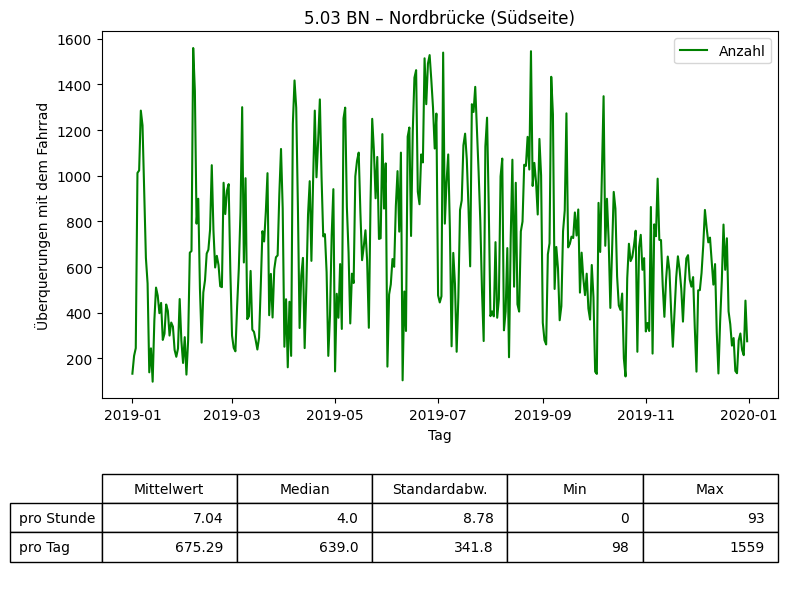

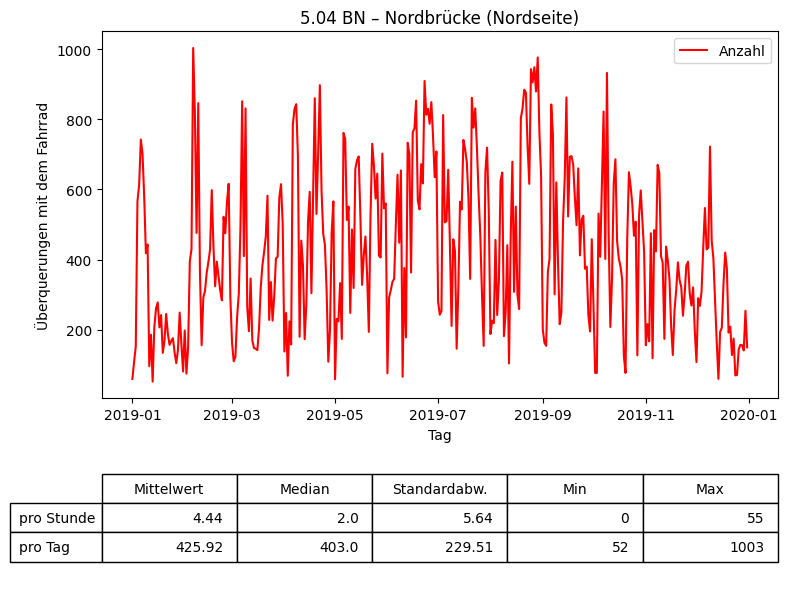

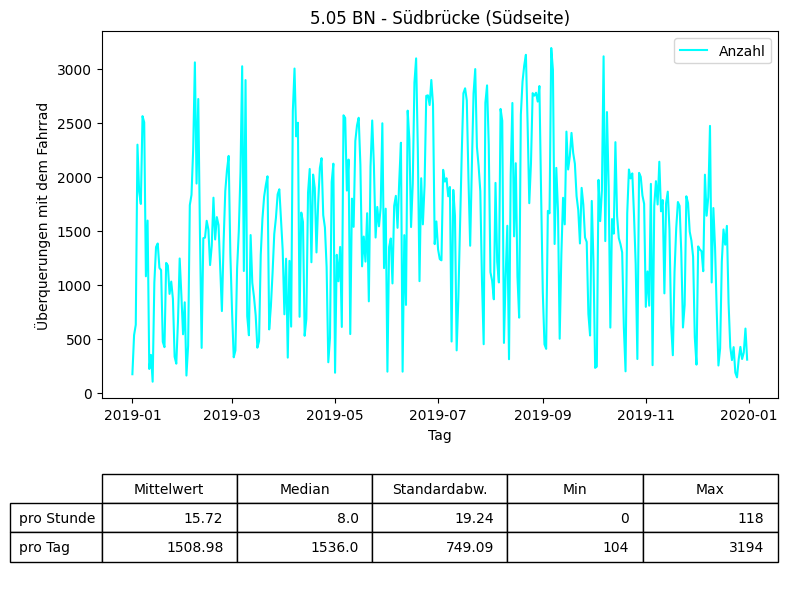

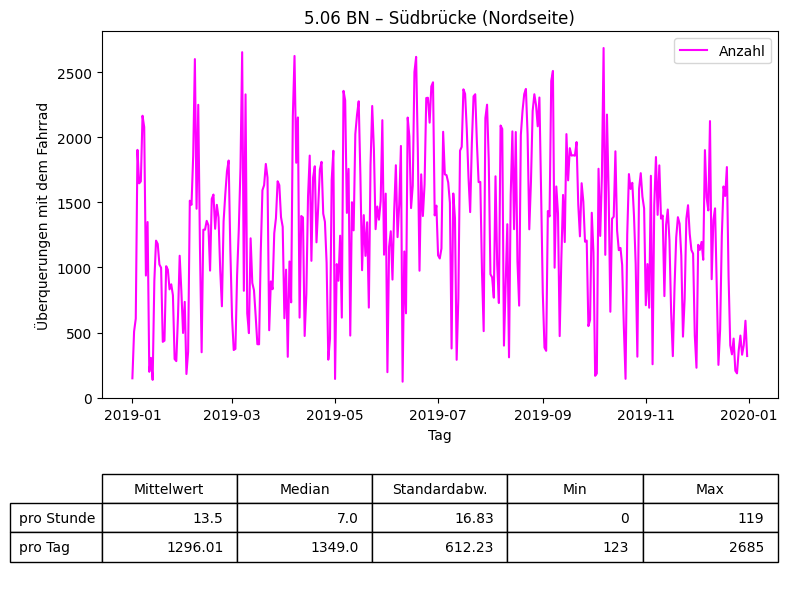

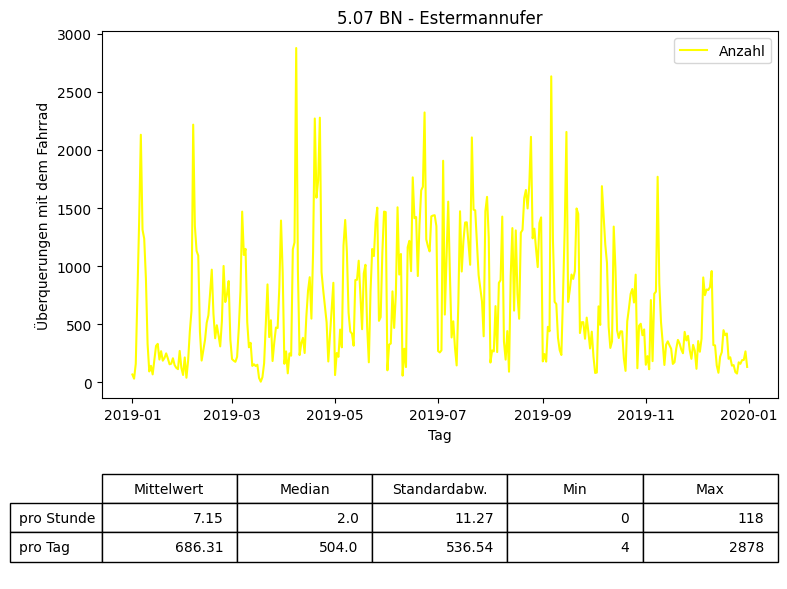

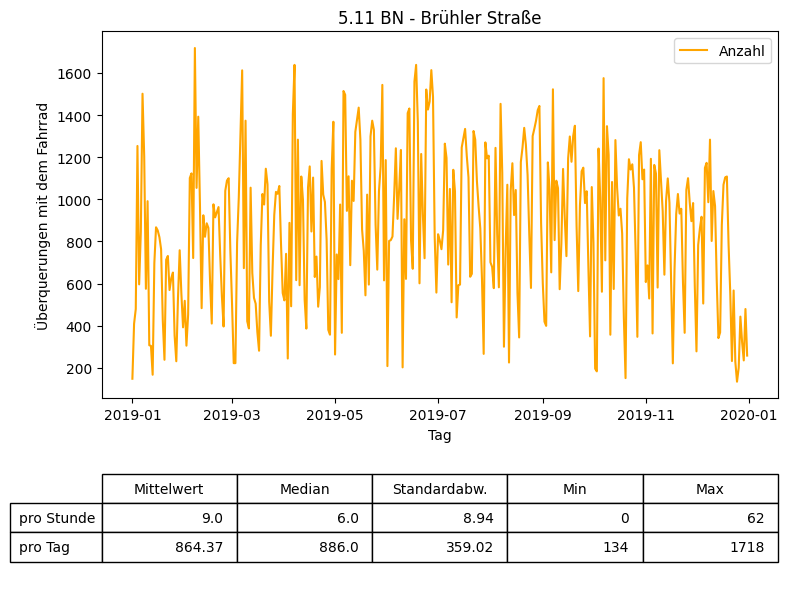

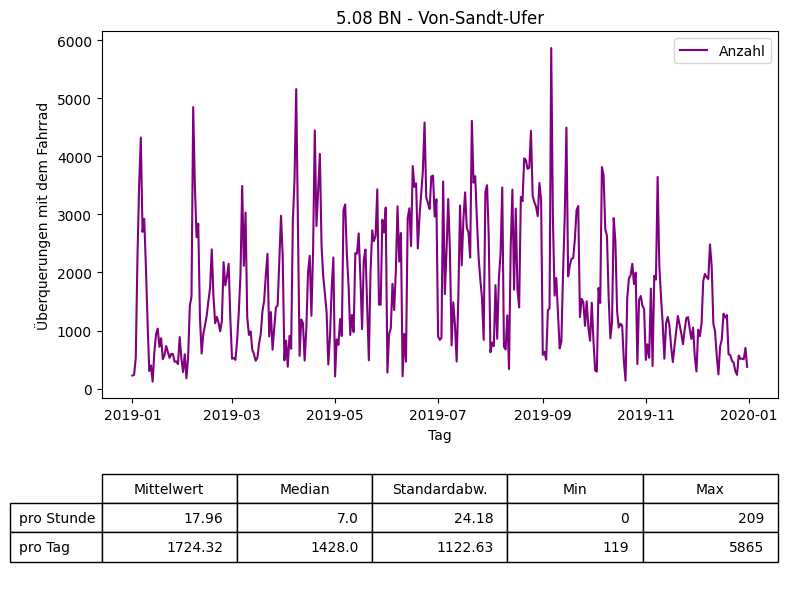

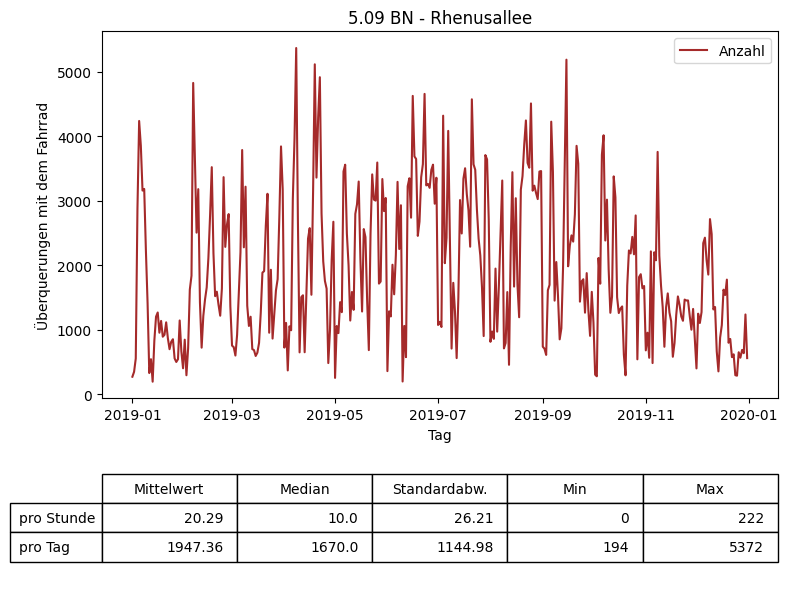

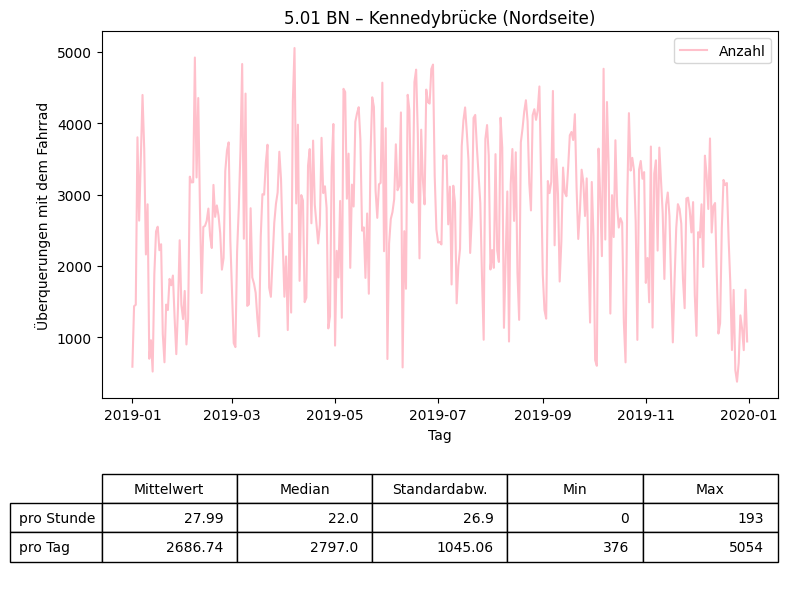

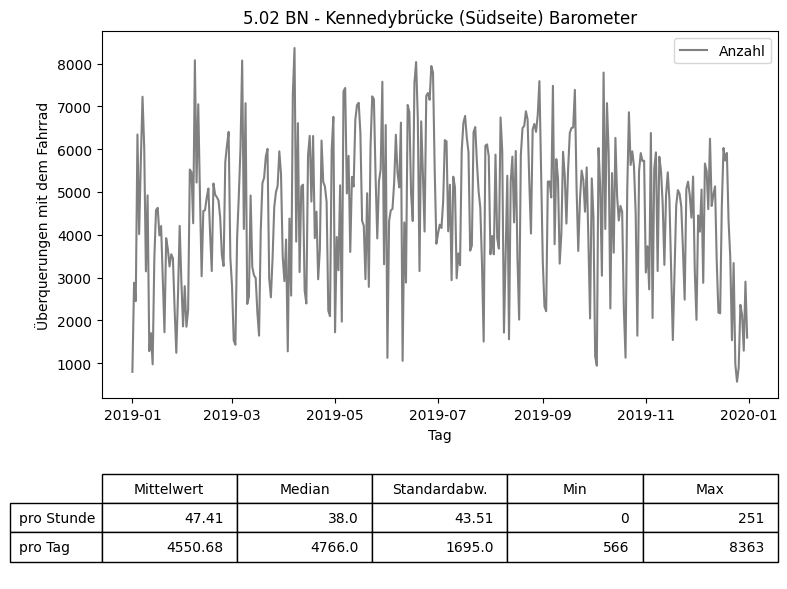

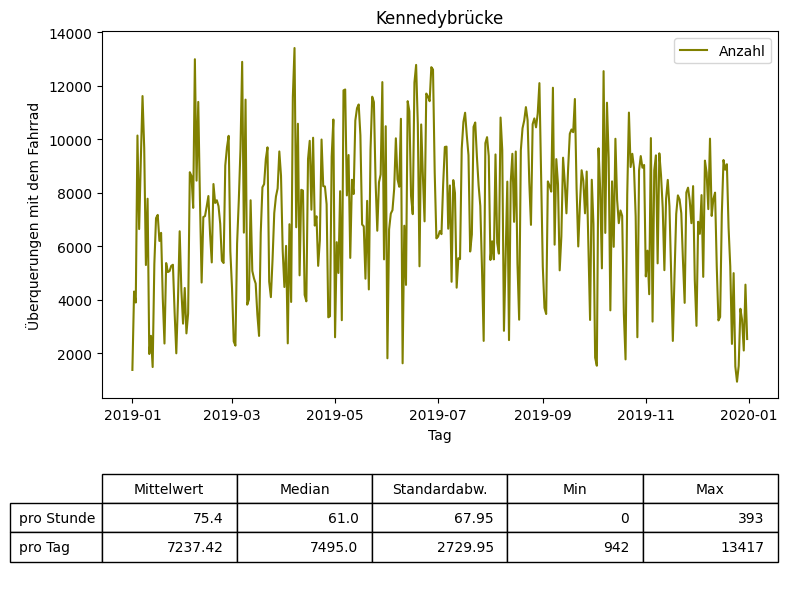

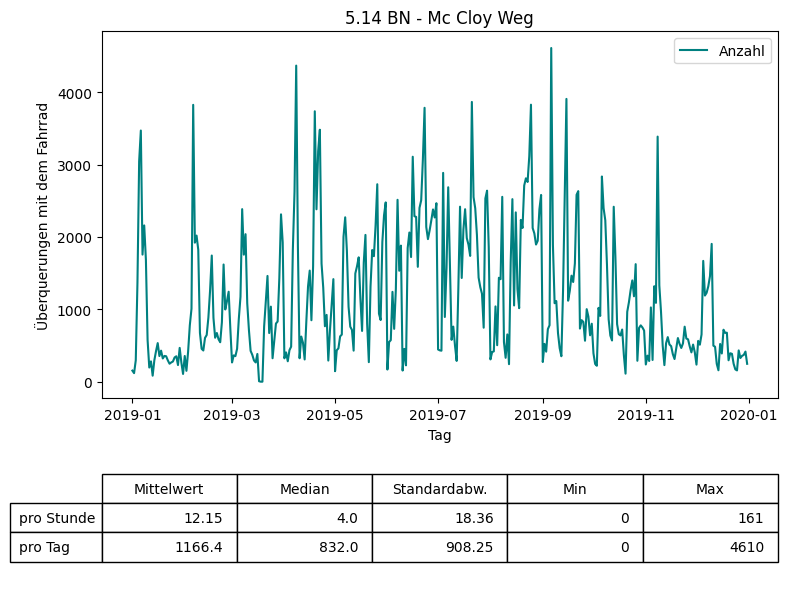

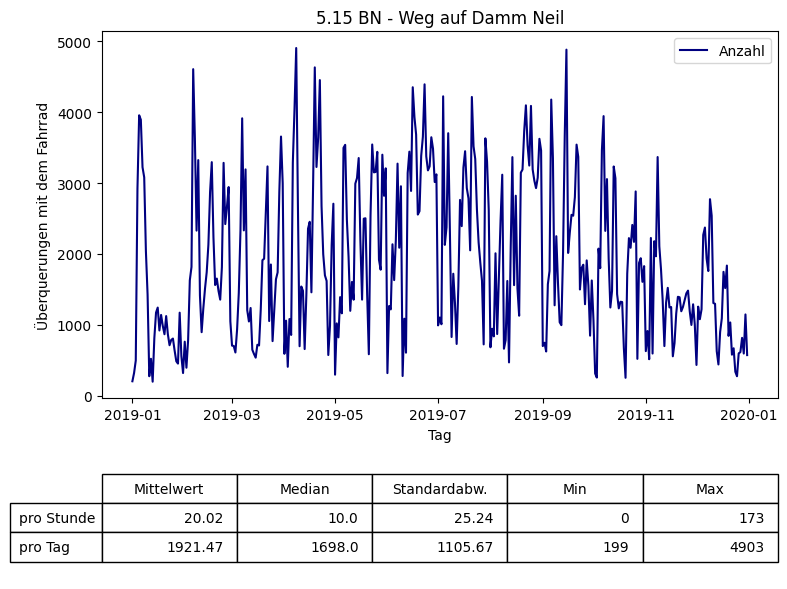

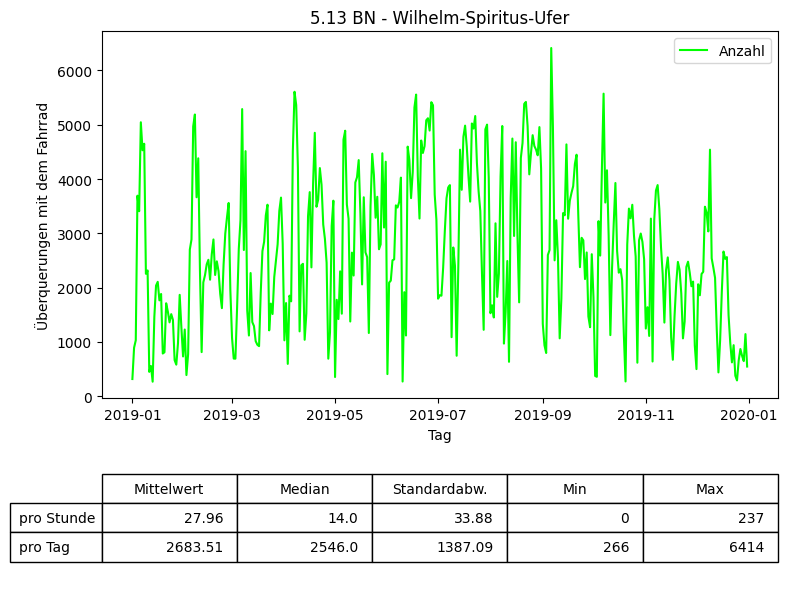

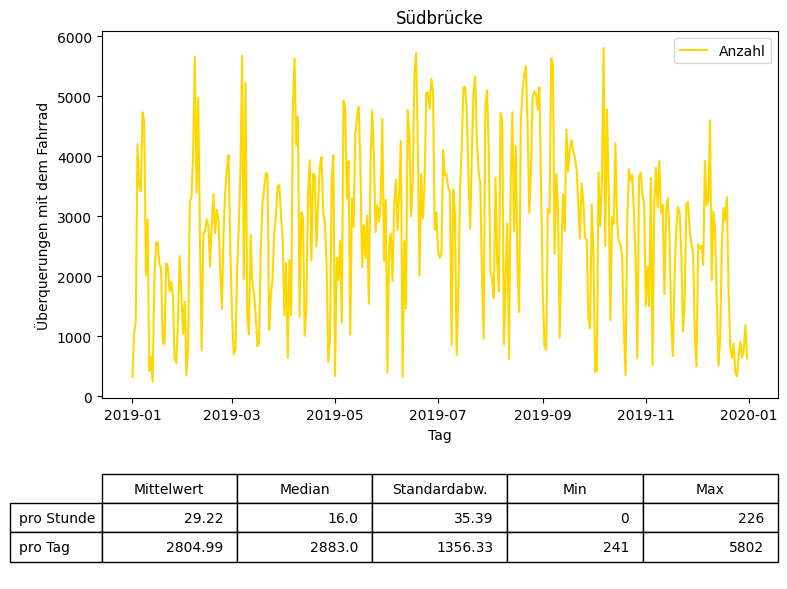

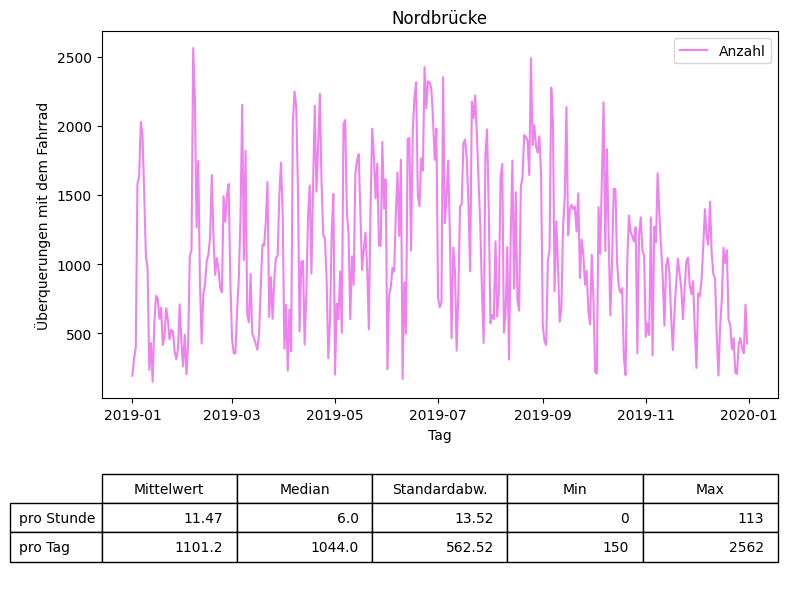

In [4]:
import os

for filename in os.listdir('../Projektdatensaetze/2019'):
    if filename.endswith('.csv') and filename != 'standortinformationen_dauerzählsstellen.csv':
        print(filename)
        df: pd.DataFrame = pd.read_csv('../Projektdatensaetze/2019/' + filename, sep=';|,', keep_default_na=False, encoding='utf-8' )
        df1 = df.copy()
        #df1.fillna(0, inplace = True)
        #df1['5.10 BN – Bröhltalweg'].fillna(0, inplace = True) 
        
        df1 = df1.drop(columns=df1.columns[0:7])
        df1 = df1.drop(columns=df1.columns[6])
        #print(df.head())
        df1 = df1.rename(columns={df1.columns[0]: 'time'})
        
        df1['time'] = pd.to_datetime(df1['time'], format='mixed')
        df1['days'] = df1['time'].dt.date
        iterate(df1)
    else:
        continue